In [ ]:
!python3 -m pip install pandas

In [ ]:
!python3 -m pip install sklearn

In [195]:
import numpy
import scipy
from autograd import jacobian
import time
from matplotlib import pyplot
import pandas
import sklearn.metrics

In [66]:
# Raw Data

alpha = numpy.random.uniform(0, 1)
beta = numpy.random.uniform(0, 1)

eps = 0.001
N = 100
xk = []
yk = []
y_plot = []

for k in range(N):
    x = k / 100
    y = alpha * x + beta + numpy.random.normal(0,1)
    y_plot.append(alpha * x + beta)
    xk.append(x)
    yk.append(y)

In [67]:
# linear approximant
def linear_func(x, a, b):
    return a * x + b

# rational approximant
def rational_func(x,a,b):
    return a / (1 + b * x)

def least_squares(x, f):
    sum = 0
    for k in range(100):
        sum += (f(xk[k], x[0], x[1]) - yk[k])**2

    return sum

In [171]:
def gradient_descent(f, args):
    return scipy.optimize.minimize(
        f,
        x0=(0, 0),
        method='BFGS',
        args=(args,),
        tol=eps
    )

start = time.time()
result = gradient_descent(least_squares, linear_func)
time_lgd = round(time.time() - start, 3) # time
lmin_grad, lmax_grad = result.x
iter_lgd = result.nit # number of function calls


start = time.time()
result = gradient_descent(least_squares, rational_func)
time_rgd = round(time.time() - start, 3)
rmin_grad, rmax_grad = result.x
iter_rgd = result.nit

In [172]:
def conjugate_gradient_algorithm(f, args):
    return scipy.optimize.minimize(
        f,
        x0=(0,0),
        method='CG',
        args=(args,)
    )

start = time.time()
result = conjugate_gradient_algorithm(least_squares, linear_func)
time_lcgd = round(time.time() - start, 3)
lmin_cgrad, lmax_cgrad = result.x
iter_lcgd = result.nit

start = time.time()
result = conjugate_gradient_algorithm(least_squares, rational_func)
time_rcgd = round(time.time() - start, 3)
rmin_cgrad, rmax_cgrad = result.x
iter_rcgd = result.nit

In [173]:
def newtons_method(f, args):
    return scipy.optimize.minimize(
        f,
        x0=(0, 0),
        method='Newton-CG',
        jac=jacobian(f),
        args=(args,),
        tol=eps
    )

start = time.time()
result = newtons_method(least_squares, linear_func)
time_lncg = round(time.time() - start, 3)
lmin_ncg, lmax_ncg = result.x
iter_lncg = result.nit

start = time.time()
result = newtons_method(least_squares, rational_func)
time_rncg = round(time.time() - start, 3)
rmin_ncg, rmax_ncg = result.x
iter_rncg = result.nit

In [174]:
def levenberg_marquardt(f,x,y):
    return scipy.optimize.curve_fit(
        f,
        xdata=x,
        ydata=y,
        method='lm',
        full_output=True
    )

start = time.time()
result = levenberg_marquardt(linear_func, xk,yk)
time_llm = round(time.time() - start, 3)
lmin_lm, lmax_lm = result[0]
iter_llm = result[2]["nfev"]

start = time.time()
result = levenberg_marquardt(rational_func, xk,yk)
time_rlm = round(time.time() - start, 3)
rmin_lm, rmax_lm = result[0]
iter_rlm = result[2]["nfev"]

## Results Report for Linear Approximant

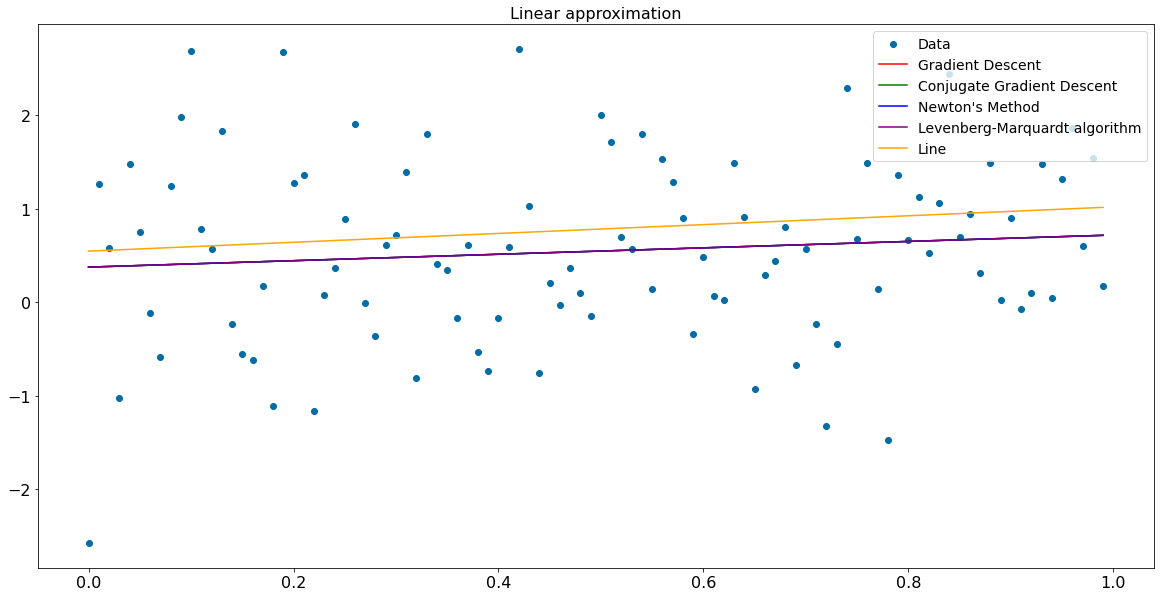

In [136]:
from tkinter import font


pyplot.style.use('tableau-colorblind10')

pyplot.figure(figsize=(20, 10))
pyplot.scatter(xk, yk,  label='Data')

pyplot.plot(xk, [linear_func(each, lmin_grad, lmax_grad) for each in xk],
            label='Gradient Descent', color='r')

pyplot.plot(xk, [linear_func(each, lmin_cgrad, lmax_cgrad) for each in xk],
            label='Conjugate Gradient Descent', color='g')
            
pyplot.plot(xk, [linear_func(each, lmin_ncg, lmax_ncg) for each in xk],
            label='Newton\'s Method', color='b')

pyplot.plot(xk, [linear_func(each, lmin_lm, lmax_lm) for each in xk], 
            label='Levenberg-Marquardt algorithm', color='purple')


pyplot.plot(xk, y_plot, label='Line', color='orange')

pyplot.yticks(fontsize=16)
pyplot.xticks(fontsize=16)
pyplot.legend(loc='upper right', fontsize=14)
pyplot.title('Linear approximation', fontsize=16)
pyplot.show()

In [175]:
pandas.set_option("display.precision", 10)
result_linear = pandas.DataFrame([
    ['Gradient descent method', iter_lgd, time_lgd],
    ['Conjugate gradient descent method', iter_lcgd, time_lcgd],
    ['Newton’s method', iter_lncg, time_lncg],
    ['Levenberg-Marquardt algorithm', iter_llm, time_llm]],
    columns=['Method','Number of iterations', 'Execution time'])

result_linear

,Method,Number of iterations,Execution time
0,Gradient descent method,2,0.005
1,Conjugate gradient descent method,2,0.010
2,Newton’s method,4,0.100
3,Levenberg-Marquardt algorithm,10,0.003


## Results Report for Rational Approximant

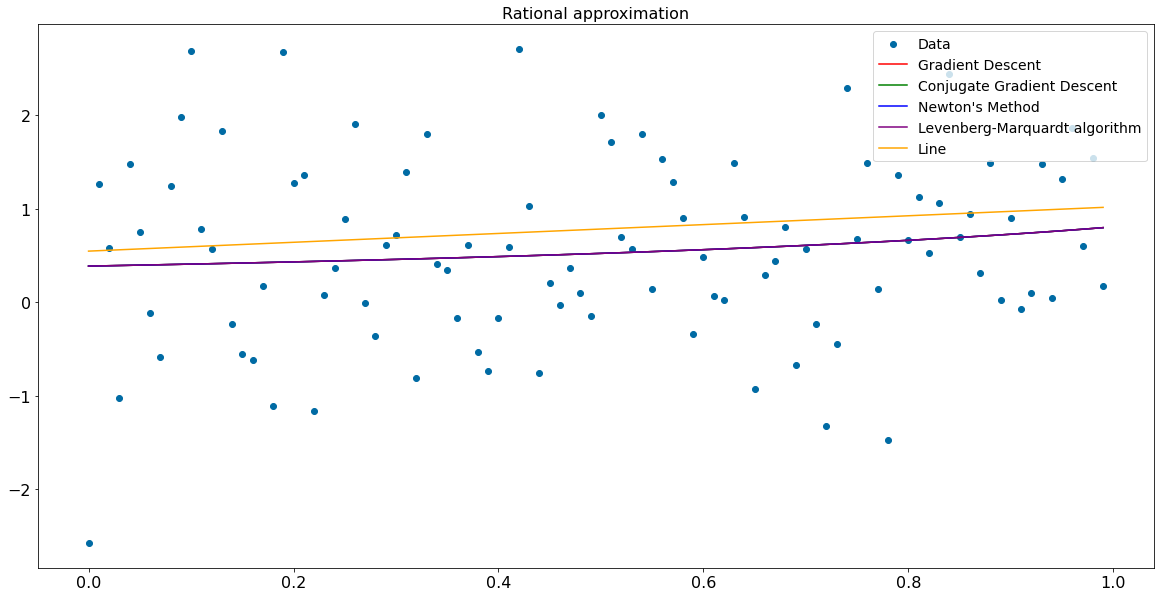

In [137]:
pyplot.style.use('tableau-colorblind10')

pyplot.figure(figsize=(20, 10))
pyplot.scatter(xk, yk,  label='Data')

pyplot.plot(xk, [rational_func(each, rmin_grad, rmax_grad) for each in xk],
            label='Gradient Descent', color='r')

pyplot.plot(xk, [rational_func(each, rmin_cgrad, rmax_cgrad) for each in xk],
            label='Conjugate Gradient Descent', color='g')
            
pyplot.plot(xk, [rational_func(each, rmin_ncg, rmax_ncg) for each in xk], 
            label='Newton\'s Method', color='b')

pyplot.plot(xk, [rational_func(each, rmin_lm, rmax_lm) for each in xk],
            label='Levenberg-Marquardt algorithm', color='purple')

pyplot.plot(xk, y_plot, label='Line', color='orange')


pyplot.yticks(fontsize=16)
pyplot.xticks(fontsize=16)
pyplot.legend(loc='upper right', fontsize=14)
pyplot.title('Rational approximation', fontsize=16)
pyplot.show()

In [176]:
result_rational = pandas.DataFrame([
    ['Gradient descent method', iter_rgd, time_rgd],
    ['Conjugate gradient descent method', iter_rcgd, time_rcgd],
    ['Newton’s method', iter_rncg, time_rncg],
    ['Levenberg-Marquardt algorithm', iter_rlm, time_rlm]],
    columns=['Method','Number of iterations', 'Execution time'])

result_rational

,Method,Number of iterations,Execution time
0,Gradient descent method,11,0.004
1,Conjugate gradient descent method,12,0.007
2,Newton’s method,8,0.512
3,Levenberg-Marquardt algorithm,27,0.001


## Lab 2 Comparison

In [163]:
def brute_search(f, args):
    return scipy.optimize.brute(
        f,
        ranges=(slice(0, 1, eps), (slice(0, 1, eps))),
        args=(args,),
        disp=True
    )

def gauss_search(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        method='CG',
        args=(args,),
        options={
            'disp':True
        }
    )

def neldermead(function, args):
    return scipy.optimize.minimize(
        function,
        x0=(0, 0),
        bounds=[(0, 1), (0, 1)],
        method='Nelder-Mead',
        args=(args,),
        options={
            'disp':True
        }
    )

Measure average running time of each algorithm

In [ ]:
import statistics

ts = []
for i in range(5):
    start = time.time()
    # gradient_descent(least_squares, rational_func)
    # conjugate_gradient_algorithm(least_squares, rational_func)
    # newtons_method(least_squares, rational_func)
    # levenberg_marquardt(rational_func, xk,yk)
    brute_search(least_squares, rational_func)
    # gauss_search(least_squares, rational_func)
    # neldermead(least_squares, rational_func)
    time_lex = round(time.time() - start, 3)
    ts.append(time_lex)

# lmin_ex, lmax_ex = result
print(statistics.mean(ts))

In [213]:
lmin_ex, lmax_ex = brute_search(least_squares, linear_func)
rmin_ex, rmax_ex = brute_search(least_squares, rational_func)

lmin_cd, lmax_cd = gauss_search(least_squares, linear_func).x
rmin_cd, rmax_cd = gauss_search(least_squares, rational_func).x

ln_min, ln_max = neldermead(least_squares, linear_func).x
rn_min, rn_max = neldermead(least_squares, rational_func).x

Optimization terminated successfully.
         Current function value: 95.018452
         Iterations: 20
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: 94.855923
         Iterations: 46
         Function evaluations: 89
Optimization terminated successfully.
         Current function value: 95.018452
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 94.855923
         Iterations: 12
         Function evaluations: 78
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 95.018452
         Iterations: 72
         Function evaluations: 137
Optimization terminated successfully.
         Current function value: 96.002008
         Iterations: 42
         Function evaluations: 73


## Visualization

Linear Approximation

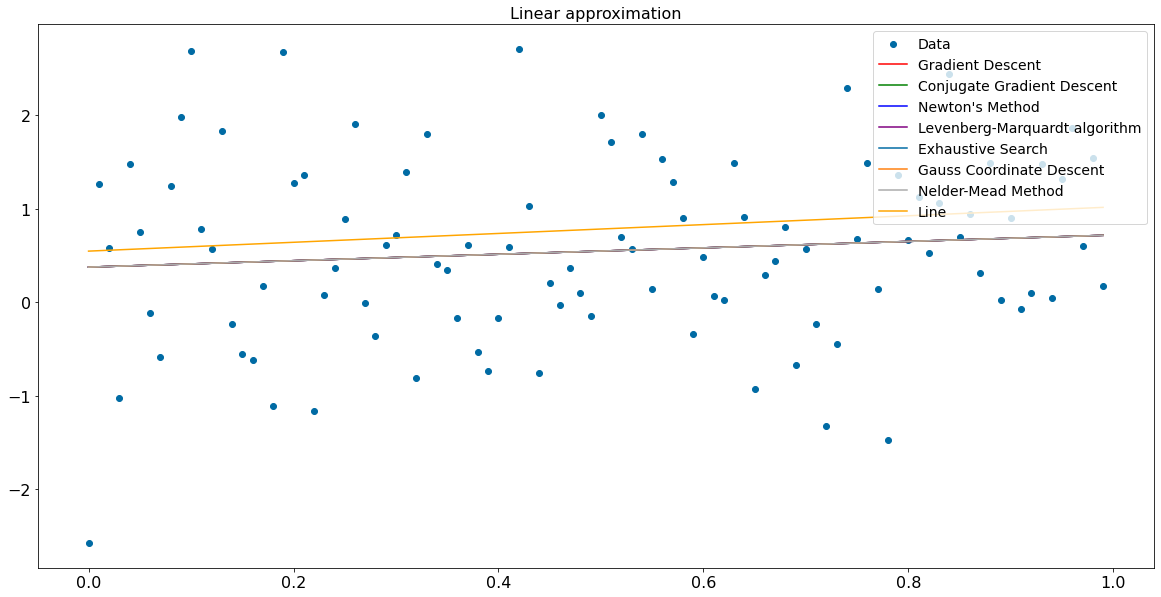

In [218]:
from tkinter import font


pyplot.style.use('tableau-colorblind10')

pyplot.figure(figsize=(20, 10))
pyplot.scatter(xk, yk,  label='Data')

pyplot.plot(xk, [linear_func(each, lmin_grad, lmax_grad) for each in xk],
            label='Gradient Descent', color='r')

pyplot.plot(xk, [linear_func(each, lmin_cgrad, lmax_cgrad) for each in xk],
            label='Conjugate Gradient Descent', color='g')
            
pyplot.plot(xk, [linear_func(each, lmin_ncg, lmax_ncg) for each in xk],
            label='Newton\'s Method', color='b')

pyplot.plot(xk, [linear_func(each, lmin_lm, lmax_lm) for each in xk], 
            label='Levenberg-Marquardt algorithm', color='purple')

pyplot.plot(xk, [linear_func(each, lmin_ex, lmax_ex) for each in xk],
            label='Exhaustive Search')


pyplot.plot(xk, [linear_func(each, lmin_cd, lmax_cd) for each in xk],
            label='Gauss Coordinate Descent')

pyplot.plot(xk, [linear_func(each, ln_min, ln_max) for each in xk],
            label='Nelder-Mead Method')

pyplot.plot(xk, y_plot, label='Line', color='orange')

pyplot.yticks(fontsize=16)
pyplot.xticks(fontsize=16)
pyplot.legend(loc='upper right', fontsize=14)
pyplot.title('Linear approximation', fontsize=16)
pyplot.show()

Rational Approximation

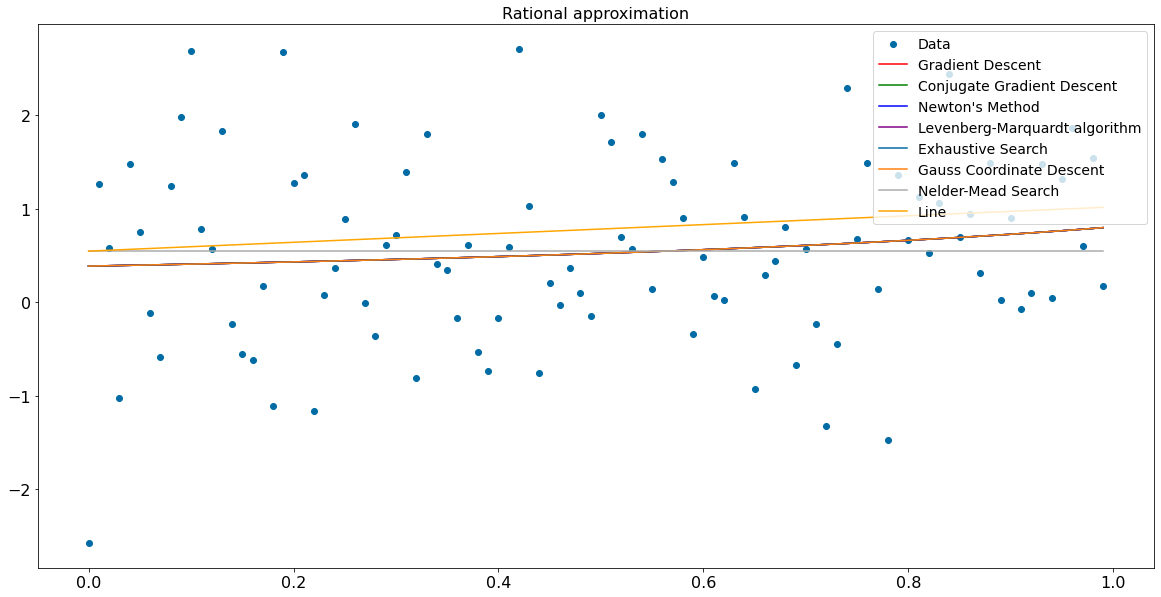

In [217]:
from tkinter import font


pyplot.style.use('tableau-colorblind10')

pyplot.figure(figsize=(20, 10))
pyplot.scatter(xk, yk,  label='Data')

pyplot.plot(xk, [rational_func(each, rmin_grad, rmax_grad) for each in xk],
            label='Gradient Descent', color='r')

pyplot.plot(xk, [rational_func(each, rmin_cgrad, rmax_cgrad) for each in xk],
            label='Conjugate Gradient Descent', color='g')
            
pyplot.plot(xk, [rational_func(each, rmin_ncg, rmax_ncg) for each in xk],
            label='Newton\'s Method', color='b')

pyplot.plot(xk, [rational_func(each, rmin_lm, rmax_lm) for each in xk], 
            label='Levenberg-Marquardt algorithm', color='purple')

pyplot.plot(xk, [rational_func(each, rmin_ex, rmax_ex) for each in xk],
            label='Exhaustive Search')

pyplot.plot(xk, [rational_func(each, rmin_cd, rmax_cd) for each in xk],
            label='Gauss Coordinate Descent')

pyplot.plot(xk, [rational_func(each, rn_min, rn_max) for each in xk],
            label='Nelder-Mead Method')

pyplot.plot(xk, y_plot, label='Line', color='orange')

pyplot.yticks(fontsize=16)
pyplot.xticks(fontsize=16)
pyplot.legend(loc='upper right', fontsize=14)
pyplot.title('Rational approximation', fontsize=16)
pyplot.show()